# Project Machine Learning Kelompok 4
**Tahapan Exploratory Data Analysis**

Nama Kelompok :

1. Wilhelmus Medhavi
2. Alfiyanti S.
3. Mayang Indi G
4. Sumayya
5. Anggina Dwi F.
6. Credenda M.
7. Dimas Fauzi Prasetyo

In [ ]:
# Import modul
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Load dataset
sample = pd.read_csv('Sample Prediction Dataset.csv')
train = pd.read_csv('Training Data.csv')
test = pd.read_csv('Test Data.csv')
sample

,id,risk_flag
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,1
27997,27998,0
27998,27999,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 28000 non-null  int64 
 1   Income             28000 non-null  int64 
 2   Age                28000 non-null  int64 
 3   Experience         28000 non-null  int64 
 4   Married/Single     28000 non-null  object
 5   House_Ownership    28000 non-null  object
 6   Car_Ownership      28000 non-null  object
 7   Profession         28000 non-null  object
 8   CITY               28000 non-null  object
 9   STATE              28000 non-null  object
 10  CURRENT_JOB_YRS    28000 non-null  int64 
 11  CURRENT_HOUSE_YRS  28000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.6+ MB


In [ ]:
# Melihat sebaran data berdasarkan proporsi risk flag
train['Risk_Flag'].value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

In [ ]:
# Melihat proporsi pembagian data train dan test
x=252000+28000
252000/x

0.9

**1. Descriptive Statistics**

Melihat sebaran data dengan function info dan describe.

In [ ]:
# Melihat isi rangkuman data train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
# Memsisahkan data kontinu dan kategorikal
kontinu = ['Id','Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag']
kategori = ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']

In [ ]:
# Melihat sebaran data kontinu
train[kontinu].describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [ ]:
# Melihat sebaran data kategorikal
train[kategori].describe()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


In [ ]:
 # Mengecek nilai unik dan totalnya pada kategorikal
for i in kategori :
  j = i
  print('Variabel :\n',i)
  print('Nilai unik :\n',train[i].unique())
  print('Jumah nilai :\n',train[i].value_counts())
  print()
  i = j
  i=+1

Variabel :
 Married/Single
Nilai unik :
 ['single' 'married']
Jumah nilai :
 single     226272
married     25728
Name: Married/Single, dtype: int64

Variabel :
 House_Ownership
Nilai unik :
 ['rented' 'norent_noown' 'owned']
Jumah nilai :
 rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

Variabel :
 Car_Ownership
Nilai unik :
 ['no' 'yes']
Jumah nilai :
 no     176000
yes     76000
Name: Car_Ownership, dtype: int64

Variabel :
 Profession
Nilai unik :
 ['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Techn

**Hasil observasi :**

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
Seluruh kolom sudah sesuai berdasarkan nama kolom dan tipe datanya, kecuali pada bagian kolom kota(city) dan negara bagian(state) yang terdapat angka dalam datanya yang berbentuk object-string.


B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
Tidak terdapat kolom data yang kosong.


C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)
Seluruh data terlihat normal, tidak ditemukan masalah pada bagian summary.

**2. Univariate Analysis**

Melakukan visualisasi untuk melihat distribusi masing-masing kolom.

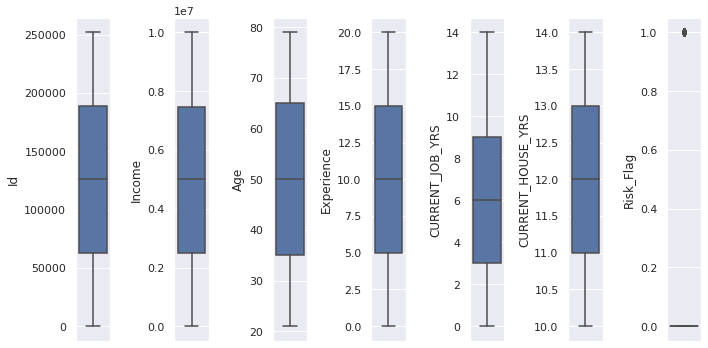

In [ ]:
# Melakukan visualiasi data kontinu (boxplot)
fitur1 = kontinu

for i in range(0,len(fitur1)):
  sns.set(rc={'figure.figsize':(10,5)})
  plt.subplot(1,len(fitur1),i+1)
  sns.boxplot(y=train[fitur1[i]],orient='v')
  plt.tight_layout()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


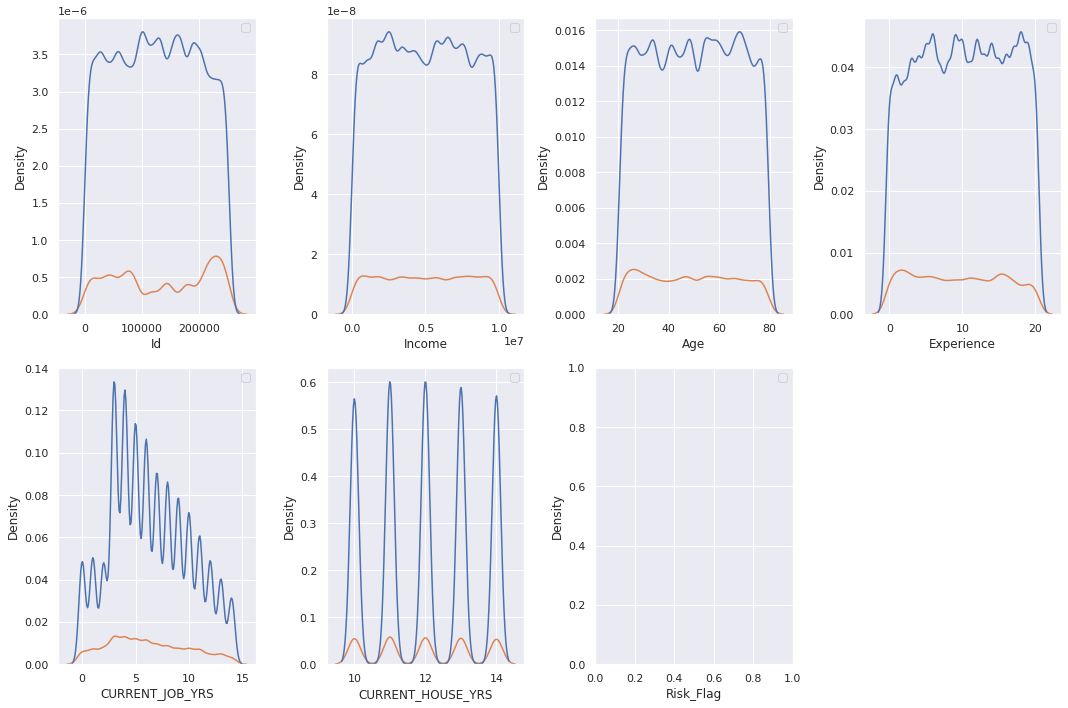

In [ ]:
# Melakukan visualiasi data kontinu (boxplot)
fitur1 = kontinu

for i in range(0,len(fitur1)):
  sns.set(rc={'figure.figsize':(15,10)})
  plt.subplot(2,4,i+1)
  sns.kdeplot(x=train[fitur1[i]],hue=train['Risk_Flag']).legend(loc='upper right')
  plt.xlabel(fitur1[i])
  plt.tight_layout()

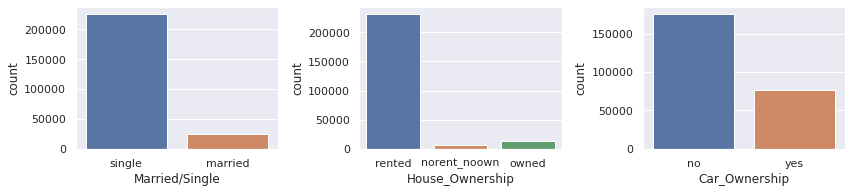

In [ ]:
# Melakukan visualisasi data kategorikal
kategori1 =['Married/Single','House_Ownership','Car_Ownership']
fitur2 = kategori1

for i in range(0,len(fitur2)):
  sns.set(rc={'figure.figsize':(12,5)})
  plt.subplot(2,len(fitur2),i+1)
  sns.countplot(x=train[fitur2[i]])
  plt.tight_layout()

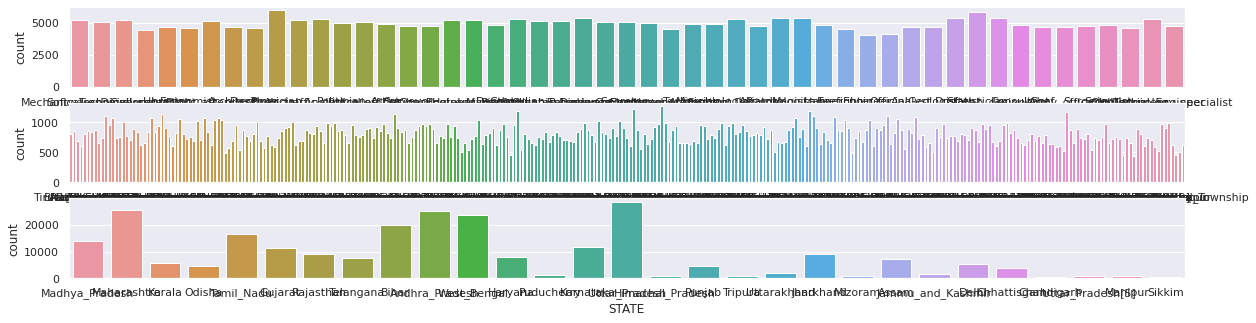

In [ ]:
# Melakukan visualisasi data kategorikal ('Profession','CITY','STATE')
kategori2 = ['Profession','CITY','STATE']
fitur2 = kategori2

for i in range(0,len(fitur2)):
  sns.set(rc={'figure.figsize':(20,5)})
  plt.subplot(len(fitur2),1,i+1)
  sns.countplot(x=train[fitur2[i]])

**Hasil observasi :**

Tidak ditemukan bentuk grafik yang perlu dilakukan tindakan khusus(skewness, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Sebaran data kategori yang timpang pada feature merupakan indikasi ketidakgunaan feature. Beberapa column yang timpang diantaranya adalah house ownership, car ownership, dan married/single.Untuk tahapan processing data sebaiknya tidak mengambil kolom city karena terlalu banyak nilai valuenya. 


**3. Multivariate Analysis**
Analisis beberapa kolom sekaligus untuk mencari hubungan antar kolom.


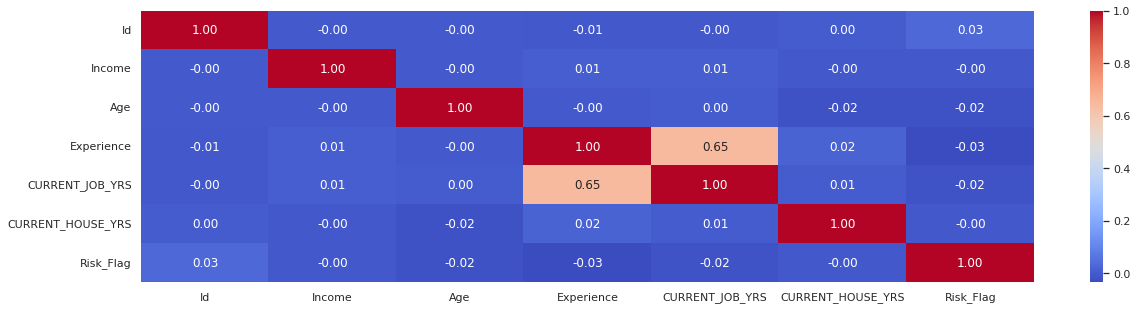

In [ ]:
# Melihat korelasi antar variabel dengan heatmap sns
sns.heatmap(train.corr(),cmap='coolwarm',annot=True,fmt='.2f')

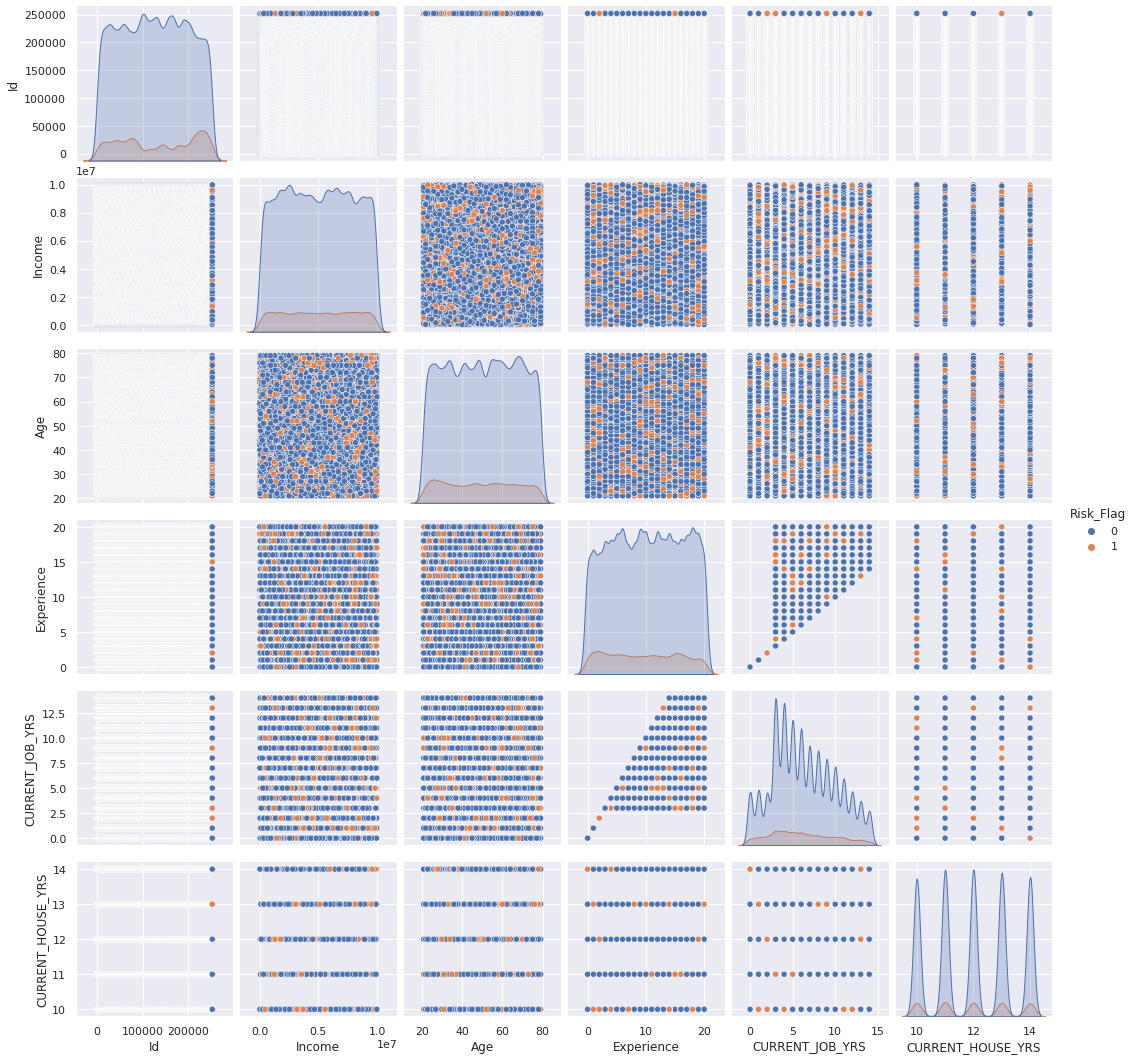

In [ ]:
# Melihat korelasi dengan kde plot antar variabel
sns.pairplot(train,diag_kind='kde',hue='Risk_Flag')

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?

Korelasi antara feature cenderung rendah, tidak ada yang memiliki korelasi diatas 0,1. Hanya variabel experience, age, dan current job years yang memiliki korelasi negatif (berbanding terbalik) dengan variabel risk flag secara berturut-turut sebesar (-0.03, -0.02, -0.02). Variabel ID memiliki nilai 0.03 namun tidak memiliki kausalitas dengan variabel risk flag.


B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?

Terdapat korelasi sedang (0.65) pada variabel experience dan current job years, sebaiknya dipilih salah satu variabel untuk digunakan sebagai feature. Variabel lainnya tidak ada memiliki korelasi diatas nilai 0,1.


# Perbaikan dan Penambahan EDA

In [ ]:
# Berdasarkan hasil EDA sebelumnya ditemukan permasalahan value data pada kolom CITY dan STATE
# value kedua kolom tersebut memiliki [] sehingga perlu dibersihkan untuk mencegah duplikasi data

# Membuat list untuk menyimpan data yang dibersihkan
list_city = train['CITY']
list_state = train['STATE']
list_new_city = []
list_new_state = []

# Eksekusi pembersihan data
for i in list_city :
  city = i.split('[')[0].strip()
  list_new_city.append(city)
for i in list_state :
  state = i.split('[')[0].strip()
  list_new_state.append(state)

# Memasukan kolom ke dataset
train['City'] = list_new_city
train['State'] = list_new_state

In [ ]:
# Mengecek isi data train kembali
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
 13  City               252000 non-null  object
 14  State              252000 non-null  object
dtypes: int64(7), object(8)
memory usage: 28.8+ MB


In [ ]:
# Mengecek data dari kedua kolom baru
city_state = ['City','State']

for i in city_state :
  j = i
  print('Variabel :\n',i)
  print('Nilai unik :\n',train[i].unique())
  print('Jumah nilai :\n',train[i].value_counts())
  print()
  i = j
  i=+1

Variabel :
 City
Nilai unik :
 ['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli' 'Jalgaon'
 'Tiruppur' 'Jamnagar' 'Kota' 'Karimnagar' 'Hajipur' 'Adoni' 'Erode'
 'Kollam' 'Madurai' 'Anantapuram' 'Kamarhati' 'Bhusawal' 'Sirsa'
 'Amaravati' 'Secunderabad' 'Ahmedabad' 'Ajmer' 'Ongole' 'Miryalaguda'
 'Ambattur' 'Indore' 'Pondicherry' 'Shimoga' 'Chennai' 'Gulbarga'
 'Khammam' 'Saharanpur' 'Gopalpur' 'Amravati' 'Udupi' 'Howrah'
 'Aurangabad' 'Hospet' 'Shimla' 'Khandwa' 'Bidhannagar' 'Bellary'
 'Danapur' 'Purnia' 'Bijapur' 'Patiala' 'Malda' 'Sagar' 'Durgapur'
 'Junagadh' 'Singrauli' 'Agartala' 'Thanjavur' 'Hindupur' 'Naihati'
 'North_Dumdum' 'Panchkula' 'Anantapur' 'Serampore' 'Bathinda' 'Nadiad'
 'Kanpur' 'Haridwar' 'Berhampur' 'Jamshedpur' 'Hyderabad' 'Bidar'
 'Kottayam' 'Solapur' 'Suryapet' 'Aizawl' 'Asansol' 'Deoghar' 'Eluru'
 'Ulhasnagar' 'Aligarh' 'South_Dumdum' 'Berhampore' 'Gandhinagar'
 'Sonipat' 'Muzaffarpur' 'Raichur' 'Rajpur_Sonarpur' 'Ambarnath' 'Katihar'
 'Kozhikode'

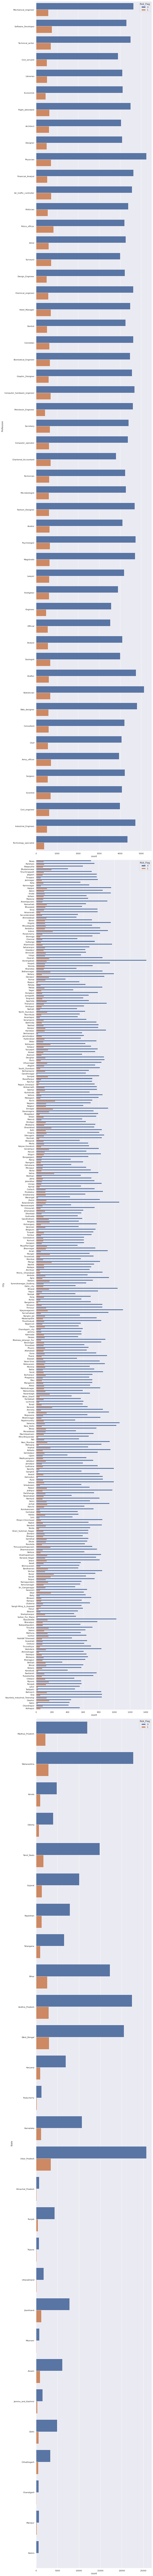

In [ ]:
# Melihat visualisasi data kategorikal (dilihat kembali karena menggunakan data yang sudah bersih)

cats_h = ['Profession','City','State']
plt.figure(figsize=(12, 200)) #figsize=(12, 15)
for i in range(0, len(cats_h)):
    plt.subplot(3, 1, i+1)
    sns.countplot(y = train[cats_h[i]], orient='h', hue=train['Risk_Flag'])
    plt.tight_layout()

In [ ]:
# melihat ada tidaknya outlier berdasarkan Z-score
print(f'Jumlah baris sebelum memfilter outlier: {len(train)}')

filtered_entries = np.array([True] * len(train))

for col in kontinu:
    zscore = abs(stats.zscore(train[col]))
    filtered_entries = (zscore < 3)
    
train_fil = train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(train_fil)}')

Jumlah baris sebelum memfilter outlier: 252000
Jumlah baris setelah memfilter outlier: 252000


In [ ]:
# Melihat sebaran data customer yang beresiko
train_risk = train[(train['Risk_Flag']==1)]
train_risk.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,30996.000000,3.099600e+04,30996.00000,30996.000000,30996.000000,30996.000000,30996.0
mean,132246.261711,4.973359e+06,48.96035,9.531101,6.168893,11.981449,1.0
std,80585.131183,2.921065e+06,17.36874,6.071810,3.748200,1.400140,0.0
min,4.000000,1.067500e+04,21.00000,0.000000,0.000000,10.000000,1.0
25%,60103.750000,2.421029e+06,33.00000,4.000000,3.000000,11.000000,1.0
50%,138138.500000,4.977653e+06,49.00000,9.000000,6.000000,12.000000,1.0
75%,213395.250000,7.556052e+06,64.00000,15.000000,9.000000,13.000000,1.0
max,251994.000000,9.994501e+06,79.00000,20.000000,14.000000,14.000000,1.0


In [ ]:
# Mengecek urutan pertama dari customer beresiko pada kolom pekerjaan, kota, negara bagian 
print(train_risk['Profession'].describe())
print(train_risk['City'].describe())
print(train_risk['State'].describe())

count              30996
unique                51
top       Police_officer
freq                 826
Name: Profession, dtype: object
count     30996
unique      316
top       Kochi
freq        243
Name: City, dtype: object
count             30996
unique               28
top       Uttar_Pradesh
freq               3440
Name: State, dtype: object


In [ ]:
# Membuat dataset untuk pekerjaan, kota, negara bagian dari customer bermasalah

risk_prof = train_risk.groupby('Profession').agg({'Risk_Flag':'count'})
risk_city = train_risk.groupby('City').agg({'Risk_Flag':'count'})
risk_state = train_risk.groupby('State').agg({'Risk_Flag':'count'})

df_risk_prof = pd.DataFrame(data=risk_prof).rename(columns={'Risk_Flag':'Count'}).sort_values(by='Count',ascending=False).reset_index()
df_risk_city = pd.DataFrame(data=risk_city).rename(columns={'Risk_Flag':'Count'}).sort_values(by='Count',ascending=False).reset_index()
df_risk_state = pd.DataFrame(data=risk_state).rename(columns={'Risk_Flag':'Count'}).sort_values(by='Count',ascending=False).reset_index()

In [ ]:
# Melihat dataset pekerjaan customer bermasalah
df_risk_prof.head(10)

,Profession,Count
0,Police_officer,826
1,Software_Developer,750
2,Air_traffic_controller,715
3,Surveyor,714
4,Physician,710
5,Army_officer,709
6,Hotel_Manager,701
7,Technical_writer,697
8,Chartered_Accountant,690
9,Scientist,690


In [ ]:
df_risk_city.head(10)


,City,Count
0,Kochi,243
1,Satna,232
2,Buxar,228
3,Srinagar,216
4,Indore,212
5,Barasat,206
6,Mango,200
7,Bhubaneswar,198
8,Ghaziabad,196
9,Sikar,191


In [ ]:
df_risk_state.head(10)

,State,Count
0,Uttar_Pradesh,3440
1,West_Bengal,3009
2,Andhra_Pradesh,2935
3,Maharashtra,2895
4,Bihar,2583
5,Madhya_Pradesh,2180
6,Tamil_Nadu,1706
7,Gujarat,1343
8,Rajasthan,1292
9,Jharkhand,1195


In [ ]:
# Melihat sebaran umur bagi customer beresiko
risk_age = train_risk.groupby('Age').agg({'Risk_Flag':'count'})
df_risk_age = pd.DataFrame(data=risk_age).rename(columns={'Risk_Flag':'Count'}).sort_values(by='Count',ascending=False).reset_index()
df_risk_age.head(10)

,Age,Count
0,22,770
1,66,737
2,27,720
3,33,719
4,26,719
5,76,666
6,54,660
7,24,631
8,47,616
9,28,602


**Business Insight :** 

1. Diketahui 30.996 dari 252.000 merupakan nasabah *risk flag*, yang artinya terdapat 12.3% dari total nasabah. Sebagian besar nasabah memiliki status belum berkeluarga, tidak memiliki mobil, mengontrak rumah, dan telah bekerja selama 3 tahun. Besar pendapatan nasabah memiliki nilai rata-rata sekitar 5 juta (Rp. 5.000,000).
2. Kolom umur, datanya berpusat pada umur 35-65 tahun (usia produktif kerja). Namun untuk nasabah berumur di bawah 30 tahun memiliki *risk flag* tertinggi dengan jumlah 770 nasabah yang berumur 22 tahun, yang artinya 0.31% dari total nasabah.
3. Sebagian besar nasabah berprofesi sebagai Fisikawan dan berdasarkan kolom profesi diketahui bahwa 826 Polisi sebagai nasabah *risk flag*. Artinya profesi Polisi merupakan nasabah dengan *risk flag* tertinggi yaitu 0.33% dari total nasabah.
4. Berdasarkan data bagian(*state*), Uttar Pradesh adalah bagian(*state*) dengan nasabah paling banyak dan sekaligus nasabah dengan *risk flag* tertinggi sebesar 1.33% dari total nasabah, yang artinya 3.343 dari 252.000 nasabah.
5. Sebagian besar nasabah terdapat pada kota Vijayanagaram. Dan berdasarkan kolom kota, dapat diketahui bahwa Kochi sebagai kota dengan nasabah *risk flag* tertinggi yaitu 0.1% dari total nasabah, yang artinya 243 dari 252.000 nasabah. 







